In [1]:
import pandas as pd
from tqdm import tqdm

# 전처리

In [2]:
df_news = pd.read_csv('./data/news_2020.csv')

df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁\n\n...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] \n\n\n\n(서울=뉴스1) 임세영 기자 = 곽상도 자...
3,"한국당, 추미애 檢 고발..""선거법 위반""","곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공무상..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 차명진 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태 선..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과\n\n\n\n열린민주당 정봉주 최고위원(사진)이 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


In [3]:
df_news[df_news['content'] == 'No content available']

,title,content
4149,"[21대 총선] 광주 동남갑, '3선 장병완' 민주당 도전 막아낼까",No content available
4296,"'암벽여제' 김자인, 남편 민주당 입당에 ""믿고 응원""",No content available
5594,"'욱토크' 박지원 ""문재인 정부, 제일 못하는 건 청년실업 문제""",No content available
5596,"'욱토크' 박지원 ""홍준표, 친분 있지만 사이 나쁘다…나한테 못 당해""",No content available
5677,"정민당 ""'음원사재기' 송하예 소속사 고발""...송하예 측 ""사실무근·법적대응""",No content available
...,...,...
88799,'황교안을 향한 손짓',No content available
88976,이낙연 위원장 '황기철 후보 믿어주세요',No content available
92764,유세하는 이낙연,No content available
96636,"연매협 ""김근태 후보, 연예인 이용 이슈몰이…직접 소명해야""",No content available


## 필요없는 문자 제거

In [4]:
df_news = df_news[df_news['content'] != 'No content available']
df_news = df_news.drop_duplicates(subset = ['title'])
df_news = df_news.copy()
df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁\n\n...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] \n\n\n\n(서울=뉴스1) 임세영 기자 = 곽상도 자...
3,"한국당, 추미애 檢 고발..""선거법 위반""","곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공무상..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 차명진 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태 선..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과\n\n\n\n열린민주당 정봉주 최고위원(사진)이 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


In [5]:
df_news['content'] = df_news['content'].str.replace('\n', ' ')
df_news['content'] = df_news['content'].str.replace('/', ' ')


df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...
3,"한국당, 추미애 檢 고발..""선거법 위반""","곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공무상..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 차명진 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태 선..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


## 후보 이름을 당으로 변환

In [7]:
people_df = pd.read_csv('./data/news_2020_후보.csv')

people_df

,name,party
0,이낙연,더불어민주당
1,고민정,더불어민주당
2,황교안,미래통합당
3,홍준표,무소속
4,배현진,미래통합당
...,...,...
1398,정해정,민생당
1399,조성실,정의당
1400,조환기,민생당
1401,진용우,국민의당


In [8]:
# 사전으로 만들기(key : 이름, value : 당)

name_party_dic = dict(zip(people_df['name'], people_df['party']))

name_party_dic

{'이낙연': '더불어민주당',
 '고민정': '더불어민주당',
 '황교안': '미래통합당',
 '홍준표': '무소속',
 '배현진': '미래통합당',
 '박경미': '더불어민주당',
 '심상정': '정의당',
 '정청래': '더불어민주당',
 '강선우': '더불어민주당',
 '이수진': '미래통합당',
 '김봉준': '국가혁명배당금당',
 '태구민': '미래통합당',
 '김효근': '국가혁명배당금당',
 '류호정': '정의당',
 '김민수': '미래통합당',
 '김성기': '국가혁명배당금당',
 '김은혜': '미래통합당',
 '이재정': '더불어민주당',
 '김민석': '더불어민주당',
 '김가은': '국가혁명배당금당',
 '이상훈': '국가혁명배당금당',
 '이진호': '국가혁명배당금당',
 '진선미': '더불어민주당',
 '윤창중': '무소속',
 '나경원': '미래통합당',
 '백종헌': '미래통합당',
 '진성준': '더불어민주당',
 '조수진': '우리공화당',
 '황지윤': '국가혁명배당금당',
 '황보승희': '미래통합당',
 '황운하': '더불어민주당',
 '이준석': '미래통합당',
 '이소윤': '국가혁명배당금당',
 '허경영': '국가혁명배당금당',
 '허성정': '국가혁명배당금당',
 '이정근': '더불어민주당',
 '김미애': '미래통합당',
 '이나영': '무소속',
 '오세훈': '미래통합당',
 '김교흥': '더불어민주당',
 '남인순': '더불어민주당',
 '양금희': '미래통합당',
 '윤희숙': '민중당',
 '황창식': '국가혁명배당금당',
 '양원영': '더불어시민당',
 '장제원': '미래통합당',
 '김수민': '미래통합당',
 '유기홍': '더불어민주당',
 '전현희': '더불어민주당',
 '김영배': '더불어민주당',
 '전희경': '미래통합당',
 '이민정': '국가혁명배당금당',
 '박주민': '더불어민주당',
 '정공명': '국가혁명배당금당',
 '신현영': '더불어시민당',
 '임오경': '더불어민주당',


In [9]:
df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...
3,"한국당, 추미애 檢 고발..""선거법 위반""","곽상도 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공무상..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 차명진 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 김진태 선..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '오세훈만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


In [10]:
# title 열의 각 값에 대해 사람 이름을 당의 이름으로 변경

for idx, row in tqdm(df_news.iterrows()):
    for name, party in name_party_dic.items():
        if name in row['title']:
            df_news.at[idx, 'title'] = row['title'].replace(name, party)
            
        elif name in row['content']:
            df_news.at[idx, 'content'] = row['content'].replace(name, party)

79410it [08:08, 162.50it/s]


In [11]:
df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련 ..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...
3,"한국당, 추미애 檢 고발..""선거법 위반""","미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천'..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 미래통합당 제명,"통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합당..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일 ...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종인...
98228,"[총선2020] 범여권, '미래통합당만 떨어뜨리면 된다' 계산 섰나","민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해 ..."


## 문장으로 나누기

In [12]:
df_news['content'] = df_news['content'].str.split('.')

df_news

,title,content
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",[JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"[ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련..."
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...
3,"한국당, 추미애 檢 고발..""선거법 위반""","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""..."
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","[""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천..."
...,...,...
98225,‘세월호 막말’ 닷새만에… 미래통합당 제명,"[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합..."
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,[이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종...
98228,"[총선2020] 범여권, '미래통합당만 떨어뜨리면 된다' 계산 섰나","[민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해..."


## 당에 대한 문장 나누기

In [17]:
party_names = list(people_df['party'].unique())

party_names

['더불어민주당',
 '미래통합당',
 '무소속',
 '정의당',
 '국가혁명배당금당',
 '미래한국당',
 '더불어시민당',
 '열린민주당',
 '민중당',
 '새벽당',
 '민생당',
 '국민의당',
 '우리공화당',
 '민중민주당',
 '기본소득당',
 '국민새정당',
 '한국복지당',
 '노동당',
 '친박신당',
 '여성의당',
 '기독자유통일당',
 '가자!평화인권당',
 '녹색당',
 '한국경제당',
 '한나라당',
 '새누리당',
 '통일민주당',
 '대한당',
 '홍익당',
 '공화당',
 '자유당',
 '미래당',
 '대한민국당',
 '깨어있는시민연대당',
 '우리당',
 '가자환경당',
 '코리아',
 '충청의미래당',
 '자영업당',
 '남북통일당',
 '미래민주당',
 '국민참여신당']

당에 관한 기사만

In [19]:
# 당에 관한 기사만

party_sentences = []
party_lst = []

for data in tqdm(df_news.iloc[:, 1]):
    res = []
    party_name = []
    for j in range(len(data)):
        for party in party_names:
            if party in data[j]:
                party_name.append(party)
                res.append(data[j])
        else:
            continue
    party_sentences.append(res)
    party_lst.append(party_name)

df_news['party_content'] = party_sentences
df_news['party_name'] = party_lst

100%|█████████████████████████████████████████████████████████████████████████| 79410/79410 [00:07<00:00, 10355.83it/s]


In [20]:
len_cnt = 0
for idx, row in df_news.iterrows():
    len_cnt += len(row['party_name'])
len_cnt

262678

In [21]:
df_news

,title,content,party_content,party_name
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",[JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...,[kr▶ [ 크립토허브 ] ▶ [신년특집] 관련 기사 보기! ▶ 네이버 메인에서 ...,[코리아]
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"[ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련...","[ 더불어민주당은 정책, 영입을 병행 추진하고 있다, 한국당 미래통합당 의원은 “...","[더불어민주당, 미래통합당]"
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...,[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...,"[미래통합당, 코리아]"
3,"한국당, 추미애 檢 고발..""선거법 위반""","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""...","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""...","[미래통합당, 더불어민주당, 미래통합당]"
4,"文의장 ""검찰·선거개혁 단초 열어 보람…소명 다할 것""","[""공수처는 金·盧·文 세 대통령의 숙원이자 꿈"" 한국당 '아빠 찬스, 아들 공천...",[],[]
...,...,...,...,...
98225,‘세월호 막말’ 닷새만에… 미래통합당 제명,"[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합...","[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합...","[미래통합당, 미래통합당]"
98226,정봉주 “나를 개쓰레기 취급” 與 막말 비난,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...,"[더불어민주당, 열린민주당, 더불어시민당, 열린민주당, 열린민주당, 더불어민주당, ..."
98227,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,[이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종...,[com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여당...,"[미래통합당, 더불어민주당, 더불어시민당, 더불어민주당]"
98228,"[총선2020] 범여권, '미래통합당만 떨어뜨리면 된다' 계산 섰나","[민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해...","[ 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 핵...","[더불어민주당, 미래통합당, 미래통합당, 우리공화당, 공화당, 우리공화당, 공화당]"


In [22]:
df_news = df_news[df_news['party_content'].apply(lambda x : len(x) > 0)]
df_news = df_news.reset_index(drop = True)
df_news

,title,content,party_content,party_name
0,"유시민 ""검찰도 사법도 썩었지"" vs 진중권 ""유시민 망상, 대중은 현실로 믿어""",[JTBC 신년토론서 격돌조국 전 장관 사태와 '유시민의 알릴레오' 두고 논쟁 ...,[kr▶ [ 크립토허브 ] ▶ [신년특집] 관련 기사 보기! ▶ 네이버 메인에서 ...,[코리아]
1,특정 정당 맹목적 지지 없어…진보진영 유리 장담 못해 [신년 기획 - 21대 총선 분석],"[ㆍ사상 첫 18세 투표 영향은신규 유입 유권자 약 53만명여야, 청소년 전략 마련...","[ 더불어민주당은 정책, 영입을 병행 추진하고 있다, 한국당 미래통합당 의원은 “...","[더불어민주당, 미래통합당]"
2,"한국당 ""울산시장 선거 정황 의심""…추미애 고발",[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...,[[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국...,"[미래통합당, 코리아]"
3,"한국당, 추미애 檢 고발..""선거법 위반""","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""...","[미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""...","[미래통합당, 더불어민주당, 미래통합당]"
4,"靑, 이르면 6일 비서진 교체·조직 개편…더불어민주당 구로을 출마 유력",[윤 후임에 오종식·신상엽·이진석 등 거론고민정 불출마로 입장 정리한듯…사실상 중폭...,[ 출마지역으로는 문 대통령 사저가 있고 서형수 현 더불어민주당 의원이 불출마를 선...,"[더불어민주당, 더불어민주당, 더불어민주당, 코리아]"
...,...,...,...,...
71988,‘세월호 막말’ 닷새만에… 미래통합당 제명,"[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합...","[통합당, 긴급 최고위서 직권 의결… 수도권 전체 판세에 악영향 판단강원선 미래통합...","[미래통합당, 미래통합당]"
71989,정봉주 “나를 개쓰레기 취급” 與 막말 비난,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...,[논란 일자 “부적절한 표현” 사과 열린민주당 정봉주 최고위원(사진)이 12일...,"[더불어민주당, 열린민주당, 더불어시민당, 열린민주당, 열린민주당, 더불어민주당, ..."
71990,민주당 “아직 2% 부족” vs 통합당 “100석도 위태”,[이해찬 “수도권 121석중 70곳 경합”박형준 “개헌 저지선도 무너질 위기” 김종...,[com 4·15총선을 이틀 남긴 13일 정치권은 미래통합당이 제기한 ‘여당...,"[미래통합당, 더불어민주당, 더불어시민당, 더불어민주당]"
71991,"[총선2020] 범여권, '미래통합당만 떨어뜨리면 된다' 계산 섰나","[민주당 핵심 당직자들, 한날 광진을 지원방문'촛불시민모임' '대진연' 등도 계속해...","[ 더불어민주당 이낙연 상임선거대책위원장, 이인영 원내대표, 박광온 최고위원 등 핵...","[더불어민주당, 미래통합당, 미래통합당, 우리공화당, 공화당, 우리공화당, 공화당]"


In [23]:
# 리스트 풀기
senti_df = pd.DataFrame(columns=['party_content', 'party_name'])

# 기존 데이터프레임을 순회하면서 리스트 값을 분리하여 새로운 행으로 추가
for idx, row in tqdm(df_news.iterrows()):
    for content, party in zip(row['party_content'], row['party_name']):
        senti_df = pd.concat([senti_df, pd.DataFrame({'party_content': [content], 'party_name': [party]})])

71993it [15:42, 76.38it/s] 


In [24]:
senti_df = senti_df.reset_index(drop = True)
senti_df

,party_content,party_name
0,kr▶ [ 크립토허브 ] ▶ [신년특집] 관련 기사 보기! ▶ 네이버 메인에서 [...,코리아
1,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당
2,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당
3,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당
4,"17 뉴스1 <저작권자 © 뉴스1코리아, 무단전재 및 재배포 금지>자유한국당이 ...",코리아
...,...,...
262673,"이에 따라 양 정당은 녹색당(12석), 노동당(6석), 사회민주당(6석) 및...",무소속
262674,"이에 따라 양 정당은 녹색당(12석), 노동당(6석), 사회민주당(6석) 및...",노동당
262675,"이에 따라 양 정당은 녹색당(12석), 노동당(6석), 사회민주당(6석) 및...",녹색당
262676,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당


In [25]:
senti_df = senti_df[~senti_df['party_content'].str.contains('네이버 메인에서')]
senti_df = senti_df.reset_index(drop = True)

In [26]:
lst = []
for ind, row in tqdm(senti_df.iterrows()):
    content = row['party_content']
    name = row['party_name']
    for party in party_names:
        if name != party:
            content = content.replace(party, '')
    lst.append(content)

senti_df['party_content'] = lst

243426it [00:14, 16859.78it/s]


In [27]:
senti_df

,party_content,party_name
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당
1,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당
3,"17 뉴스1 <저작권자 © 뉴스1코리아, 무단전재 및 재배포 금지>자유한국당이 ...",코리아
4,"미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",미래통합당
...,...,...
243421,"이에 따라 양 정당은 (12석), (6석), 사회민주당(6석) 및 무소속 의...",무소속
243422,"이에 따라 양 정당은 (12석), 노동당(6석), 사회민주당(6석) 및 의...",노동당
243423,"이에 따라 양 정당은 녹색당(12석), (6석), 사회민주당(6석) 및 의...",녹색당
243424,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당


In [32]:
senti_df.to_csv('./data/news_2020_긍정부정_전.csv', index = False)

# 긍정/부정 구분

In [3]:
import pandas as pd

df = pd.read_csv('./data/news_2020_긍정부정_전.csv')
df

,party_content,party_name
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당
1,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당
3,"17 뉴스1 <저작권자 © 뉴스1코리아, 무단전재 및 재배포 금지>자유한국당이 ...",코리아
4,"미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",미래통합당
...,...,...
243421,"이에 따라 양 정당은 (12석), (6석), 사회민주당(6석) 및 무소속 의...",무소속
243422,"이에 따라 양 정당은 (12석), 노동당(6석), 사회민주당(6석) 및 의...",노동당
243423,"이에 따라 양 정당은 녹색당(12석), (6석), 사회민주당(6석) 및 의...",녹색당
243424,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당


## 데이터 셋 나누기

In [6]:
import numpy as np

In [7]:
# 랜덤으로 20%를 train으로 지정

rows_len = len(df)
sample_size = int(rows_len * 0.1)

random_idx = np.random.choice(df.index, sample_size, replace = False)

train_df = df.loc[random_idx]
test_df = df.drop(random_idx)

In [8]:
display(train_df)
display(test_df)

,party_content,party_name
8324,미래통합당 자유한국당 대변인은 7일 논평을 통해 “안보와 경제가 경각에 달려 있는 ...,미래통합당
143349,"민주당의 경우 '불참' 방침을 정한 외에 녹색당, 정도를 연합 파트너로 ...",녹색당
83930,미래한국당 공관위는 사무총장과 외부인사 6명으로 구성한다,미래한국당
113699,황 전 의원의 지역구 역시 공중분해 후 '춘천-철원-양구 을'로 재편된 가운...,더불어민주당
67353,미래통합당도 가만있지 않았다,미래통합당
...,...,...
77117,통합당은 우리과 자유통일당 등 보수 정당은 물론 과의 선거 연대 가능성도 열어 놓...,우리공화당
8444,입당식 종료 후 심 대표 등 지도부는 청소년들에게 정의당을 상징하는 노란 점퍼를 ...,정의당
119966,"이어 ""김 전 위원장은 강남갑 공천이 잘못된 이유를 객관적인 국민적 눈높이에서 밝히...",우리당
150620,"더불어민주당 사무총장도 ""탈당해 으로 출마해 당선된 인사들의 복당은 없을 것...",더불어민주당


,party_content,party_name
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당
1,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당
4,"미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",미래통합당
5,(사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장관 ...,더불어민주당
...,...,...
243421,"이에 따라 양 정당은 (12석), (6석), 사회민주당(6석) 및 무소속 의...",무소속
243422,"이에 따라 양 정당은 (12석), 노동당(6석), 사회민주당(6석) 및 의...",노동당
243423,"이에 따라 양 정당은 녹색당(12석), (6석), 사회민주당(6석) 및 의...",녹색당
243424,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당


In [9]:
train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [10]:
train_df

,party_content,party_name
0,미래통합당 자유한국당 대변인은 7일 논평을 통해 “안보와 경제가 경각에 달려 있는 ...,미래통합당
1,"민주당의 경우 '불참' 방침을 정한 외에 녹색당, 정도를 연합 파트너로 ...",녹색당
2,미래한국당 공관위는 사무총장과 외부인사 6명으로 구성한다,미래한국당
3,황 전 의원의 지역구 역시 공중분해 후 '춘천-철원-양구 을'로 재편된 가운...,더불어민주당
4,미래통합당도 가만있지 않았다,미래통합당
...,...,...
24337,통합당은 우리과 자유통일당 등 보수 정당은 물론 과의 선거 연대 가능성도 열어 놓...,우리공화당
24338,입당식 종료 후 심 대표 등 지도부는 청소년들에게 정의당을 상징하는 노란 점퍼를 ...,정의당
24339,"이어 ""김 전 위원장은 강남갑 공천이 잘못된 이유를 객관적인 국민적 눈높이에서 밝히...",우리당
24340,"더불어민주당 사무총장도 ""탈당해 으로 출마해 당선된 인사들의 복당은 없을 것...",더불어민주당


## BertTokenizer

In [26]:
import torch
from torch.nn import functional as F
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# KoBERT 모델과 토크나이저 불러오기
model_name = "snunlp/KR-BERT-char16424"
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case = False)
model = BertForSequenceClassification.from_pretrained(model_name)

# from transformers import LongformerTokenizer, LongformerForSequenceClassification
# import torch
# from torch.nn import functional as F
# from tqdm import tqdm

# # Longformer 모델과 토크나이저 불러오기
# model_name = 'allenai/longformer-base-4096'
# tokenizer = LongformerTokenizer.from_pretrained(model_name)
# model = LongformerForSequenceClassification.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snunlp/KR-BERT-char16424 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
# 입력 문장
text = "너가 너무 싫어"

# 토큰화 및 패딩
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# 모델로 예측
outputs = model(**inputs)

# 로짓 출력
logits = outputs.logits

# softmax를 적용하여 확률로 변환
probs = F.softmax(logits, dim=1)

# 예측 클래스
predicted_class = torch.argmax(probs, dim=1).item()

# 예측 결과 확인
if predicted_class == 1:
    sentiment = '긍정'
else:
    sentiment = '부정'

print(f"입력 문장 : {text}")
print(f"감정 분석 결과 : {sentiment}")

입력 문장 : 너가 너무 싫어
감정 분석 결과 : 부정


In [44]:
from tqdm import tqdm

classifier = pipeline("sentiment-analysis", model = model_name, tokenizer = model_name, max_length = 512)


# 감정 분석 수행
label_lst = []
for idx, row in tqdm(train_df.iterrows()):
    content = row['party_content']
    party_name = row['party_name']
    
    # 모델로 예측
    result = classifier(content)

    # 예측 결과
    sentiment = result[0]['label']

    label_lst.append(sentiment)
    
train_df['label'] = label_lst

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snunlp/KR-BERT-char16424 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
24342it [20:58, 19.34it/s]


In [45]:
train_df

,party_content,party_name,label
0,미래통합당 자유한국당 대변인은 7일 논평을 통해 “안보와 경제가 경각에 달려 있는 ...,미래통합당,LABEL_0
1,"민주당의 경우 '불참' 방침을 정한 외에 녹색당, 정도를 연합 파트너로 ...",녹색당,LABEL_1
2,미래한국당 공관위는 사무총장과 외부인사 6명으로 구성한다,미래한국당,LABEL_0
3,황 전 의원의 지역구 역시 공중분해 후 '춘천-철원-양구 을'로 재편된 가운...,더불어민주당,LABEL_0
4,미래통합당도 가만있지 않았다,미래통합당,LABEL_0
...,...,...,...
24337,통합당은 우리과 자유통일당 등 보수 정당은 물론 과의 선거 연대 가능성도 열어 놓...,우리공화당,LABEL_1
24338,입당식 종료 후 심 대표 등 지도부는 청소년들에게 정의당을 상징하는 노란 점퍼를 ...,정의당,LABEL_0
24339,"이어 ""김 전 위원장은 강남갑 공천이 잘못된 이유를 객관적인 국민적 눈높이에서 밝히...",우리당,LABEL_0
24340,"더불어민주당 사무총장도 ""탈당해 으로 출마해 당선된 인사들의 복당은 없을 것...",더불어민주당,LABEL_1


In [46]:
train_df['label'].value_counts()

label
LABEL_0    21349
LABEL_1     2993
Name: count, dtype: int64

In [47]:
train_df['label'] = train_df['label'].apply(lambda x: 1 if x == 'LABEL_1' else 0)

train_df

,party_content,party_name,label
0,미래통합당 자유한국당 대변인은 7일 논평을 통해 “안보와 경제가 경각에 달려 있는 ...,미래통합당,0
1,"민주당의 경우 '불참' 방침을 정한 외에 녹색당, 정도를 연합 파트너로 ...",녹색당,1
2,미래한국당 공관위는 사무총장과 외부인사 6명으로 구성한다,미래한국당,0
3,황 전 의원의 지역구 역시 공중분해 후 '춘천-철원-양구 을'로 재편된 가운...,더불어민주당,0
4,미래통합당도 가만있지 않았다,미래통합당,0
...,...,...,...
24337,통합당은 우리과 자유통일당 등 보수 정당은 물론 과의 선거 연대 가능성도 열어 놓...,우리공화당,1
24338,입당식 종료 후 심 대표 등 지도부는 청소년들에게 정의당을 상징하는 노란 점퍼를 ...,정의당,0
24339,"이어 ""김 전 위원장은 강남갑 공천이 잘못된 이유를 객관적인 국민적 눈높이에서 밝히...",우리당,0
24340,"더불어민주당 사무총장도 ""탈당해 으로 출마해 당선된 인사들의 복당은 없을 것...",더불어민주당,1


In [48]:
train_df.to_csv('./data/news_2020_train_df_BertTokenizer.csv', index = False)

In [ ]:
test_df.to_csv('./data/news_2020_test_df_BertTokenizer.csv', index = False)

# 긍정/부정 모델

In [162]:
import pandas as pd

## smote

In [163]:
train_df = pd.read_csv('./data/news_2020_train_df_BertTokenizer.csv')
test_df = pd.read_csv('./data/news_2020_test_df_BertTokenizer.csv')

In [165]:
# 긍정, 부정 확인

print('긍정 개수 : {}'.format(train_df['label'].value_counts()[1]))
print('부정 개수 : {}'.format(train_df['label'].value_counts()[0]))

긍정 개수 : 2993
부정 개수 : 21349


문자로 되어있는 내용을 인덱스 벡터로

너무 불균형해서 처리

In [166]:
X_train = train_df['party_content']
y_train = train_df['label']

X_test = test_df['party_content']

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환기 생성
tfidf_vectorizer = TfidfVectorizer()

# TF-IDF를 사용하여 텍스트 데이터를 벡터 형태로 변환
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test) 

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size = 0.2, random_state = 42)

In [145]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

y_resampled.value_counts()

label
0    17094
1    17094
Name: count, dtype: int64

### 로지스틱

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),  # TF-IDF 변환
    ('clf', LogisticRegression())  # 로지스틱 회귀 분류기
])

pipeline.fit(X_resampled, y_resampled)

# validation 세트에 대한 예측 결과 가져오기
y_pred_val = pipeline.predict(X_val)

Validation Accuracy: 0.8716368864243171
Confusion Matrix:
[[3841  414]
 [ 211  403]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4255
           1       0.49      0.66      0.56       614

    accuracy                           0.87      4869
   macro avg       0.72      0.78      0.74      4869
weighted avg       0.89      0.87      0.88      4869



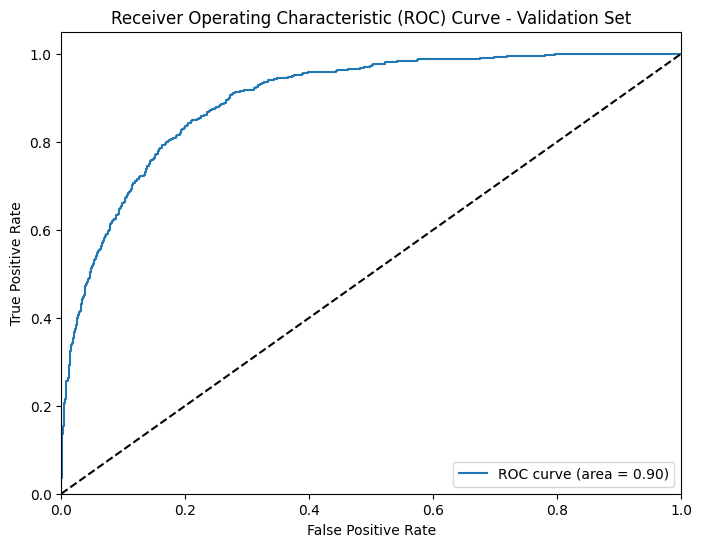

In [147]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 정확도 계산
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# 혼동 행렬(confusion matrix) 계산
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 보고서(classification report) 출력
class_report = classification_report(y_val, y_pred_val)
print("Classification Report:")
print(class_report)

# ROC 곡선 및 AUC 계산
y_pred_proba_val = pipeline.predict_proba(X_val)[:, 1]  # 양성 클래스에 대한 확률 추출
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 모델의 ROC 곡선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc="lower right")

In [148]:
pipeline.fit(X_resampled, y_resampled)

predicted_label = pipeline.predict(X_test_tfidf)

test_df['label'] = predicted_label

test_df['label'].value_counts()

label
0    182179
1     36905
Name: count, dtype: int64

### 랜덤포레스트

Validation Accuracy (Random Forest): 0.8942287944136373
Confusion Matrix (Random Forest):
[[4174   81]
 [ 434  180]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4255
           1       0.69      0.29      0.41       614

    accuracy                           0.89      4869
   macro avg       0.80      0.64      0.68      4869
weighted avg       0.88      0.89      0.87      4869



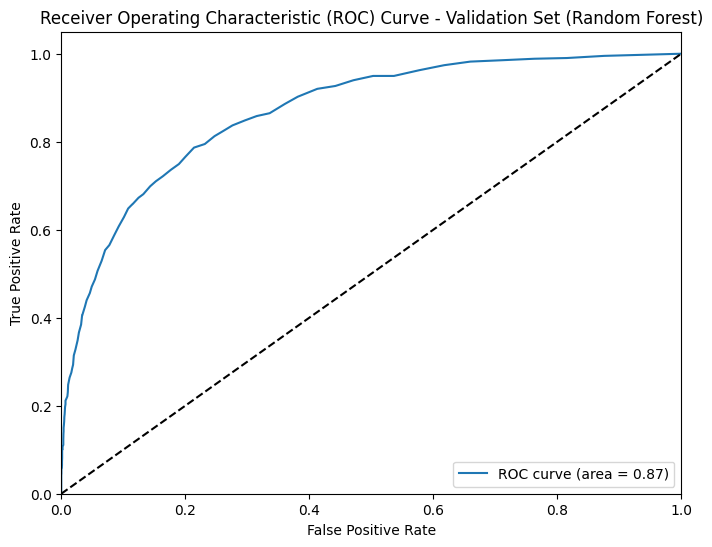

In [149]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
#     ('tfidf', TfidfVectorizer()),  # TF-IDF 변환
    ('clf', RandomForestClassifier())  # 랜덤 포레스트 분류기
])

pipeline_rf.fit(X_resampled, y_resampled)

# validation 세트에 대한 예측 결과 가져오기
y_pred_val_rf = pipeline_rf.predict(X_val)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# 정확도 계산
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("Validation Accuracy (Random Forest):", accuracy_val_rf)

# 혼동 행렬(confusion matrix) 계산
conf_matrix_rf = confusion_matrix(y_val, y_pred_val_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# 분류 보고서(classification report) 출력
class_report_rf = classification_report(y_val, y_pred_val_rf)
print("Classification Report (Random Forest):")
print(class_report_rf)

# ROC 곡선 및 AUC 계산
y_pred_proba_val_rf = pipeline_rf.predict_proba(X_val)[:, 1]  # 양성 클래스에 대한 확률 추출
fpr_val_rf, tpr_val_rf, thresholds_val_rf = roc_curve(y_val, y_pred_proba_val_rf)
roc_auc_val_rf = roc_auc_score(y_val, y_pred_proba_val_rf)

# ROC 곡선 그리기
plt.figure(figsize = (8, 6))
plt.plot(fpr_val_rf, tpr_val_rf, label='ROC curve (area = %0.2f)' % roc_auc_val_rf)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 모델의 ROC 곡선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set (Random Forest)')
plt.legend(loc = "lower right")

## NeighbourhoodCleaningRule

In [150]:
train_df = pd.read_csv('./data/news_2020_train_df_BertTokenizer.csv')
test_df = pd.read_csv('./data/news_2020_test_df_BertTokenizer.csv')

In [152]:
X_train = train_df['party_content']
y_train = train_df['label']

X_test = test_df['party_content']

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환기 생성
tfidf_vectorizer = TfidfVectorizer()

# TF-IDF를 사용하여 텍스트 데이터를 벡터 형태로 변환
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test) 

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size = 0.2, random_state = 42)

In [158]:
from imblearn.under_sampling import NeighbourhoodCleaningRule # 비대칭이라 사용

X_ncr, y_ncr = NeighbourhoodCleaningRule(kind_sel = "all",  n_neighbors = 5).fit_resample(X_train, y_train)
y_ncr.value_counts()

C:\Users\mit005\anaconda3\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_neighbourhood_cleaning_rule.py:201: FutureWarning: `kind_sel` is deprecated in 0.12 and will be removed in 0.14. It already has not effect and corresponds to the `'all'` option.
  warnings.warn(


label
0    16793
1     2379
Name: count, dtype: int64

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),  # TF-IDF 변환
    ('clf', LogisticRegression())  # 로지스틱 회귀 분류기
])

pipeline.fit(X_ncr, y_ncr)

# validation 세트에 대한 예측 결과 가져오기
y_pred_val = pipeline.predict(X_val)

Validation Accuracy: 0.8886835079071678
Confusion Matrix:
[[4245   10]
 [ 532   82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4255
           1       0.89      0.13      0.23       614

    accuracy                           0.89      4869
   macro avg       0.89      0.57      0.59      4869
weighted avg       0.89      0.89      0.85      4869



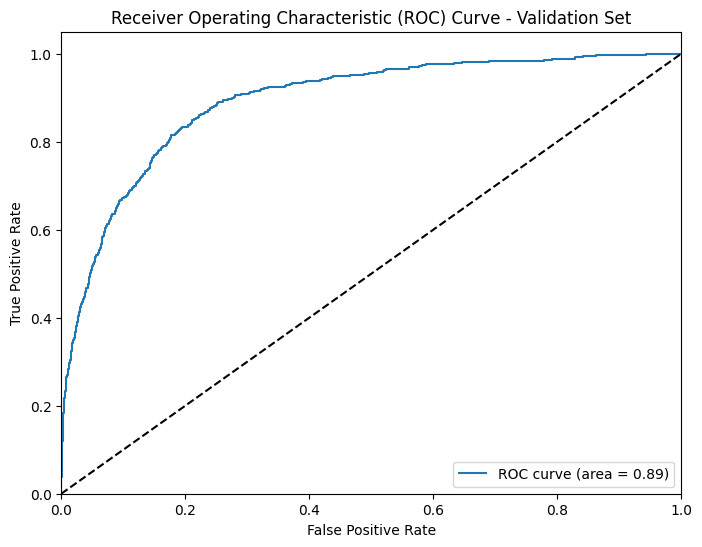

In [160]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 정확도 계산
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# 혼동 행렬(confusion matrix) 계산
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 보고서(classification report) 출력
class_report = classification_report(y_val, y_pred_val)
print("Classification Report:")
print(class_report)

# ROC 곡선 및 AUC 계산
y_pred_proba_val = pipeline.predict_proba(X_val)[:, 1]  # 양성 클래스에 대한 확률 추출
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 모델의 ROC 곡선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc="lower right")

Validation Accuracy (Random Forest): 0.8932018895050319
Confusion Matrix (Random Forest):
[[4233   22]
 [ 498  116]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4255
           1       0.84      0.19      0.31       614

    accuracy                           0.89      4869
   macro avg       0.87      0.59      0.63      4869
weighted avg       0.89      0.89      0.86      4869



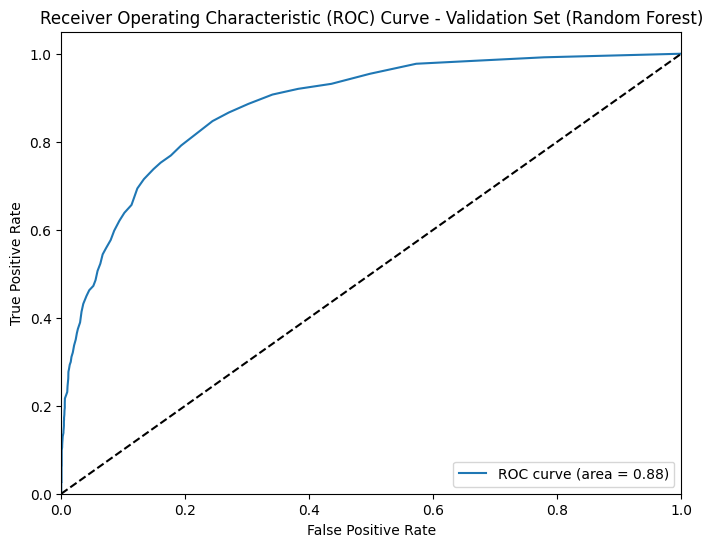

In [161]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
#     ('tfidf', TfidfVectorizer()),  # TF-IDF 변환
    ('clf', RandomForestClassifier())  # 랜덤 포레스트 분류기
])

pipeline_rf.fit(X_ncr, y_ncr)

# validation 세트에 대한 예측 결과 가져오기
y_pred_val_rf = pipeline_rf.predict(X_val)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# 정확도 계산
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("Validation Accuracy (Random Forest):", accuracy_val_rf)

# 혼동 행렬(confusion matrix) 계산
conf_matrix_rf = confusion_matrix(y_val, y_pred_val_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# 분류 보고서(classification report) 출력
class_report_rf = classification_report(y_val, y_pred_val_rf)
print("Classification Report (Random Forest):")
print(class_report_rf)

# ROC 곡선 및 AUC 계산
y_pred_proba_val_rf = pipeline_rf.predict_proba(X_val)[:, 1]  # 양성 클래스에 대한 확률 추출
fpr_val_rf, tpr_val_rf, thresholds_val_rf = roc_curve(y_val, y_pred_proba_val_rf)
roc_auc_val_rf = roc_auc_score(y_val, y_pred_proba_val_rf)

# ROC 곡선 그리기
plt.figure(figsize = (8, 6))
plt.plot(fpr_val_rf, tpr_val_rf, label='ROC curve (area = %0.2f)' % roc_auc_val_rf)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 모델의 ROC 곡선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set (Random Forest)')
plt.legend(loc = "lower right")

## SMOTEENN 

In [167]:
train_df = pd.read_csv('./data/news_2020_train_df_BertTokenizer.csv')
test_df = pd.read_csv('./data/news_2020_test_df_BertTokenizer.csv')

In [168]:
# 긍정, 부정 확인

print('긍정 개수 : {}'.format(train_df['label'].value_counts()[1]))
print('부정 개수 : {}'.format(train_df['label'].value_counts()[0]))

긍정 개수 : 2993
부정 개수 : 21349


In [172]:
X_train = train_df['party_content']
y_train = train_df['label']

X_test = test_df['party_content']

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환기 생성
tfidf_vectorizer = TfidfVectorizer()

# TF-IDF를 사용하여 텍스트 데이터를 벡터 형태로 변환
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test) 

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size = 0.2, random_state = 42)

In [175]:
from imblearn.combine import SMOTEENN  # 복합 샘플링을 위한 SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 복합 샘플링을 위한 SMOTEENN 객체 생성
smote_enn = SMOTEENN(random_state=42)

# 언더샘플링과 오버샘플링을 조합하여 데이터를 변환
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [176]:
y_resampled.value_counts()

label
1    16920
0    16524
Name: count, dtype: int64

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),  # TF-IDF 변환
    ('clf', LogisticRegression())  # 로지스틱 회귀 분류기
])

pipeline.fit(X_resampled, y_resampled)

# validation 세트에 대한 예측 결과 가져오기
y_pred_val = pipeline.predict(X_val)

Validation Accuracy: 0.8679400287533374
Confusion Matrix:
[[3816  439]
 [ 204  410]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4255
           1       0.48      0.67      0.56       614

    accuracy                           0.87      4869
   macro avg       0.72      0.78      0.74      4869
weighted avg       0.89      0.87      0.88      4869



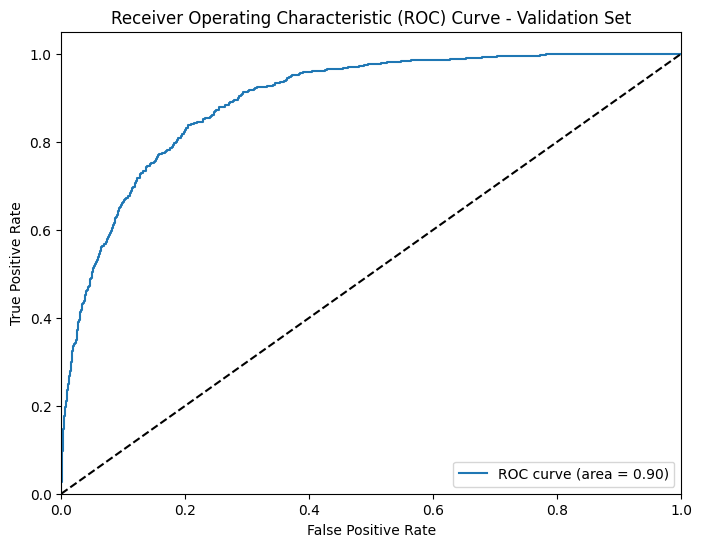

In [178]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 정확도 계산
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# 혼동 행렬(confusion matrix) 계산
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 보고서(classification report) 출력
class_report = classification_report(y_val, y_pred_val)
print("Classification Report:")
print(class_report)

# ROC 곡선 및 AUC 계산
y_pred_proba_val = pipeline.predict_proba(X_val)[:, 1]  # 양성 클래스에 대한 확률 추출
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 모델의 ROC 곡선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc="lower right")

In [179]:
pipeline.fit(X_resampled, y_resampled)

predicted_label = pipeline.predict(X_test_tfidf)

test_df['label'] = predicted_label

test_df['label'].value_counts()

label
0    180750
1     38334
Name: count, dtype: int64

In [180]:
test_df

,party_content,party_name,label
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당,0
1,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당,0
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당,0
3,"미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",미래통합당,0
4,(사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장관 ...,더불어민주당,0
...,...,...,...
219079,"이에 따라 양 정당은 (12석), (6석), 사회민주당(6석) 및 무소속 의...",무소속,1
219080,"이에 따라 양 정당은 (12석), 노동당(6석), 사회민주당(6석) 및 의...",노동당,1
219081,"이에 따라 양 정당은 녹색당(12석), (6석), 사회민주당(6석) 및 의...",녹색당,1
219082,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당,1


In [182]:
res_df = pd.concat([train_df, test_df])
res_df = res_df.reset_index(drop = True)

res_df.to_csv('./data/news_2020_긍정부정결과_BertTokenizer.csv', index = False)